<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Project- Tech- Employes Layoffs Prediction and Analysis</center>

**<center>Bigya Bajracharya </center>**
**<center>Sangam Shrestha </center>**

<hr style="border:2px solid lightblue"> </hr>

In [260]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [261]:
dataset = pd.read_csv('LayOffDataset.csv')
dataset.shape

(3000, 26)

In [262]:
# exploring the dataset
dataset.head(10)

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,2019-09-20 00:00:00.000,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,2023-02-11 00:00:00.000,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,2018-12-10 00:00:00.000,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,2021-06-21 00:00:00.000,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,2019-06-29 00:00:00.000,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,3432,Maruk,Fraval,2020-01-17 00:00:00.000,NaN,Area Sales Manager,Sheri Campos,maruk.fraval@bilearner.com,BPC,Active,...,Field Operations,03-04-1949,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,3433,Latia,Costa,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,latia.costa@bilearner.com,WBL,Active,...,General - Eng,01-07-1942,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,3434,Sharlene,Terry,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,...,Engineers,07-03-1957,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,3435,Jac,McKinzie,2018-08-18 00:00:00.000,NaN,Area Sales Manager,Sharon Becker,jac.mckinzie@bilearner.com,NEL,Active,...,Executive,15-05-1974,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,3436,Joseph,Martins,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,joseph.martins@bilearner.com,BPC,Active,...,Engineers,11-11-1949,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


In [263]:
dataset.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')

In [264]:
dataset.TerminationType.value_counts()

TerminationType
Unk            1467
Involuntary     388
Voluntary       388
Resignation     380
Retirement      377
Name: count, dtype: int64

In [265]:
dataset.isnull().sum()

EmpID                            0
FirstName                        0
LastName                         0
StartDate                        0
ExitDate                      1467
Title                            0
Supervisor                       0
ADEmail                         18
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
TerminationDescription        1467
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
dtype: int64

In [266]:
dataset.drop(columns=['TerminationDescription','EmpID','ADEmail','FirstName','LastName','DOB'],inplace=True)
dataset.head(10)

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,2019-09-20 00:00:00.000,NaN,Production Technician I,Peter Oneill,CCDR,Active,Contract,Zone C,Temporary,Unk,Production,Finance & Accounting,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,2023-02-11 00:00:00.000,NaN,Production Technician I,Renee Mccormick,EW,Active,Contract,Zone A,Part-Time,Unk,Production,Aerial,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,2018-12-10 00:00:00.000,NaN,Area Sales Manager,Crystal Walker,PL,Active,Full-Time,Zone B,Part-Time,Unk,Sales,General - Sga,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,2021-06-21 00:00:00.000,NaN,Area Sales Manager,Rebekah Wright,CCDR,Active,Contract,Zone A,Full-Time,Unk,Sales,Finance & Accounting,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,2019-06-29 00:00:00.000,NaN,Area Sales Manager,Jason Kim,TNS,Active,Contract,Zone A,Temporary,Unk,Sales,General - Con,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,2020-01-17 00:00:00.000,NaN,Area Sales Manager,Sheri Campos,BPC,Active,Contract,Zone B,Full-Time,Unk,Sales,Field Operations,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,2018-08-18 00:00:00.000,NaN,Area Sales Manager,Sharon Becker,NEL,Active,Contract,Zone B,Part-Time,Unk,Sales,Executive,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,Sales,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


In [267]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   3000 non-null   object
 1   ExitDate                    1533 non-null   object
 2   Title                       3000 non-null   object
 3   Supervisor                  3000 non-null   object
 4   BusinessUnit                3000 non-null   object
 5   EmployeeStatus              3000 non-null   object
 6   EmployeeType                3000 non-null   object
 7   PayZone                     3000 non-null   object
 8   EmployeeClassificationType  3000 non-null   object
 9   TerminationType             3000 non-null   object
 10  DepartmentType              3000 non-null   object
 11  Division                    3000 non-null   object
 12  State                       3000 non-null   object
 13  JobFunctionDescription      3000 non-null   obje

In [268]:
# Filter the DataFrame to include only records with non-null ExitDate
df_with_exit_date = dataset[dataset['ExitDate'].notnull()]

df_with_exit_date

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
6,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
9,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,Sales,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5
11,2018-08-10 00:00:00.000,2019-11-04 00:00:00.000,Area Sales Manager,Brian Miller,MSC,Active,Full-Time,Zone C,Temporary,Retirement,Sales,General - Con,GA,Technician,Female,30428,Asian,Married,Fully Meets,3
12,2022-05-25 00:00:00.000,2022-11-27 00:00:00.000,Area Sales Manager,Charles Parks,EW,Active,Full-Time,Zone A,Temporary,Involuntary,Sales,Splicing,CO,Splicer,Male,80820,Other,Single,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,2020-10-10 00:00:00.000,2022-08-05 00:00:00.000,Production Technician I,Lynn Smith,NEL,Active,Contract,Zone A,Full-Time,Voluntary,Production,Field Operations,MA,Laborer,Female,18079,Other,Married,Fully Meets,2
2994,2022-05-09 00:00:00.000,2022-09-08 00:00:00.000,Production Technician I,Donna Lawson,PL,Active,Part-Time,Zone A,Part-Time,Retirement,Production,Wireless,MA,Foreman,Female,57340,Other,Divorced,Fully Meets,1
2995,2022-06-22 00:00:00.000,2022-08-07 00:00:00.000,Production Technician I,Bethany Carter,PYZ,Leave of Absence,Part-Time,Zone C,Part-Time,Retirement,Production,Engineers,MA,Model Assistant,Female,44500,Other,Widowed,Fully Meets,3
2997,2020-12-09 00:00:00.000,2022-08-04 00:00:00.000,Production Technician I,Mr. James Castillo,TNS,Voluntarily Terminated,Contract,Zone B,Temporary,Involuntary,Production,Wireline Construction,MA,Laborer,Male,6608,White,Single,Fully Meets,2


In [269]:
df_with_exit_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1533 entries, 6 to 2998
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   1533 non-null   object
 1   ExitDate                    1533 non-null   object
 2   Title                       1533 non-null   object
 3   Supervisor                  1533 non-null   object
 4   BusinessUnit                1533 non-null   object
 5   EmployeeStatus              1533 non-null   object
 6   EmployeeType                1533 non-null   object
 7   PayZone                     1533 non-null   object
 8   EmployeeClassificationType  1533 non-null   object
 9   TerminationType             1533 non-null   object
 10  DepartmentType              1533 non-null   object
 11  Division                    1533 non-null   object
 12  State                       1533 non-null   object
 13  JobFunctionDescription      1533 non-null   object
 1

In [270]:
print(pd.unique(df_with_exit_date.loc[:, 'StartDate']))
print(pd.unique(df_with_exit_date.loc[:, 'ExitDate']))

['2022-04-06 00:00:00.000' '2020-11-06 00:00:00.000'
 '2022-01-21 00:00:00.000' ... '2022-06-22 00:00:00.000'
 '2020-12-09 00:00:00.000' '2019-05-28 00:00:00.000']
['2023-07-03 00:00:00.000' '2023-01-29 00:00:00.000'
 '2023-06-29 00:00:00.000' '2019-11-04 00:00:00.000'
 '2022-11-27 00:00:00.000' '2023-02-17 00:00:00.000'
 '2022-06-16 00:00:00.000' '2023-05-12 00:00:00.000'
 '2022-02-04 00:00:00.000' '2023-06-18 00:00:00.000'
 '2020-11-06 00:00:00.000' '2023-05-27 00:00:00.000'
 '2022-12-04 00:00:00.000' '2022-11-11 00:00:00.000'
 '2022-07-05 00:00:00.000' '2023-05-24 00:00:00.000'
 '2022-06-21 00:00:00.000' '2021-10-01 00:00:00.000'
 '2021-09-17 00:00:00.000' '2021-07-18 00:00:00.000'
 '2022-09-09 00:00:00.000' '2023-04-10 00:00:00.000'
 '2023-01-05 00:00:00.000' '2019-10-28 00:00:00.000'
 '2023-04-13 00:00:00.000' '2023-07-06 00:00:00.000'
 '2019-01-09 00:00:00.000' '2023-04-02 00:00:00.000'
 '2022-10-16 00:00:00.000' '2021-05-31 00:00:00.000'
 '2021-02-07 00:00:00.000' '2023-06-08 00

In [271]:
# Define a function to convert datetime column to seconds
def convert_datetime_to_seconds(df, column_name):
    df.loc[:, column_name] = pd.to_datetime(df[column_name], format = '%Y-%m-%d %H:%M:%S.%f')

# Convert 'StartDate' and 'ExitDate' columns to seconds
convert_datetime_to_seconds(df_with_exit_date, 'StartDate')
convert_datetime_to_seconds(df_with_exit_date, 'ExitDate')

In [272]:
print(pd.unique(df_with_exit_date.loc[:, 'Title']))
print(pd.unique(df_with_exit_date.loc[:, 'Supervisor']))
print(pd.unique(df_with_exit_date.loc[:, 'BusinessUnit']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeStatus']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeType']))
print(pd.unique(df_with_exit_date.loc[:, 'PayZone']))
print(pd.unique(df_with_exit_date.loc[:, 'EmployeeClassificationType']))
print(pd.unique(df_with_exit_date.loc[:, 'TerminationType']))
print(pd.unique(df_with_exit_date.loc[:, 'DepartmentType']))
print(pd.unique(df_with_exit_date.loc[:, 'Division']))
print(pd.unique(df_with_exit_date.loc[:, 'State']))
print(pd.unique(df_with_exit_date.loc[:, 'JobFunctionDescription']))
print(pd.unique(df_with_exit_date.loc[:, 'GenderCode']))
print(pd.unique(df_with_exit_date.loc[:, 'RaceDesc']))
print(pd.unique(df_with_exit_date.loc[:, 'MaritalDesc']))
print(pd.unique(df_with_exit_date.loc[:, 'Performance Score']))

['Area Sales Manager' 'Production Technician I' 'Production Technician II'
 'IT Support' 'Network Engineer' 'Sr. Network Engineer' 'Sr. DBA'
 'Enterprise Architect' 'Principal Data Architect' 'Data Analyst '
 'Database Administrator' 'Data Analyst' 'Data Architect' 'Sr. Accountant'
 'Software Engineer' 'CIO' 'Software Engineering Manager'
 'Shared Services Manager' 'Senior BI Developer' 'Production Manager'
 'President & CEO' 'Administrative Assistant' 'Accountant I'
 'BI Developer' 'Sales Manager' 'BI Director' 'IT Manager - Infra'
 'IT Manager - DB' 'IT Manager - Support' 'Director of Sales'
 'Director of Operations' 'IT Director']
['Jacob Braun' 'Tracy Marquez' 'George Jenkins' ... 'Bethany Carter'
 'Mr. James Castillo' 'Michael Woods']
['WBL' 'CCDR' 'BPC' 'MSC' 'EW' 'PYZ' 'NEL' 'SVG' 'TNS' 'PL']
['Active' 'Future Start' 'Voluntarily Terminated' 'Leave of Absence'
 'Terminated for Cause']
['Full-Time' 'Contract' 'Part-Time']
['Zone B' 'Zone C' 'Zone A']
['Temporary' 'Full-Time' 'Par

In [273]:
df_with_exit_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1533 entries, 6 to 2998
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   1533 non-null   object
 1   ExitDate                    1533 non-null   object
 2   Title                       1533 non-null   object
 3   Supervisor                  1533 non-null   object
 4   BusinessUnit                1533 non-null   object
 5   EmployeeStatus              1533 non-null   object
 6   EmployeeType                1533 non-null   object
 7   PayZone                     1533 non-null   object
 8   EmployeeClassificationType  1533 non-null   object
 9   TerminationType             1533 non-null   object
 10  DepartmentType              1533 non-null   object
 11  Division                    1533 non-null   object
 12  State                       1533 non-null   object
 13  JobFunctionDescription      1533 non-null   object
 1

In [274]:
# Feature engineering
df_with_exit_date['Tenure'] = (df_with_exit_date['ExitDate'] - df_with_exit_date['StartDate']) / pd.Timedelta('1D') / 365.25
# The above line calculates the tenure in years by:
# 1. Calculating the difference between ExitDate and StartDate (in days)
# 2. Converting the difference to years by dividing by 365.25 (accounting for leap years)

df_with_exit_date.head()

C:\Users\Student189\AppData\Local\Temp\ipykernel_6152\435682086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_exit_date['Tenure'] = (df_with_exit_date['ExitDate'] - df_with_exit_date['StartDate']) / pd.Timedelta('1D') / 365.25


,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,...,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Tenure
6,2022-04-06 00:00:00,2023-07-03 00:00:00,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,...,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4,1.240246
7,2020-11-06 00:00:00,2023-01-29 00:00:00,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,...,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2,2.228611
9,2022-01-21 00:00:00,2023-06-29 00:00:00,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,...,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5,1.434634
11,2018-08-10 00:00:00,2019-11-04 00:00:00,Area Sales Manager,Brian Miller,MSC,Active,Full-Time,Zone C,Temporary,Retirement,...,General - Con,GA,Technician,Female,30428,Asian,Married,Fully Meets,3,1.234771
12,2022-05-25 00:00:00,2022-11-27 00:00:00,Area Sales Manager,Charles Parks,EW,Active,Full-Time,Zone A,Temporary,Involuntary,...,Splicing,CO,Splicer,Male,80820,Other,Single,Fully Meets,3,0.509240


In [275]:
df_with_exit_date['TerminationType'].value_counts()

TerminationType
Involuntary    388
Voluntary      388
Resignation    380
Retirement     377
Name: count, dtype: int64

In [276]:
df_with_exit_date['TerminationType'] = df_with_exit_date['TerminationType'].fillna('Voluntary') # Assuming missing values are voluntary terminations
df_with_exit_date['TerminationType'] = (df_with_exit_date['TerminationType'] == 'Involuntary').astype(int)  # Convert to 0/1

C:\Users\Student189\AppData\Local\Temp\ipykernel_6152\3037886302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_exit_date['TerminationType'] = df_with_exit_date['TerminationType'].fillna('Voluntary') # Assuming missing values are voluntary terminations
C:\Users\Student189\AppData\Local\Temp\ipykernel_6152\3037886302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_exit_date['TerminationType'] = (df_with_exit_date['TerminationType'] == 'Involuntary').astype(int)  # Convert to 0/1


In [277]:
df_with_exit_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1533 entries, 6 to 2998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   StartDate                   1533 non-null   object 
 1   ExitDate                    1533 non-null   object 
 2   Title                       1533 non-null   object 
 3   Supervisor                  1533 non-null   object 
 4   BusinessUnit                1533 non-null   object 
 5   EmployeeStatus              1533 non-null   object 
 6   EmployeeType                1533 non-null   object 
 7   PayZone                     1533 non-null   object 
 8   EmployeeClassificationType  1533 non-null   object 
 9   TerminationType             1533 non-null   int32  
 10  DepartmentType              1533 non-null   object 
 11  Division                    1533 non-null   object 
 12  State                       1533 non-null   object 
 13  JobFunctionDescription      1533 non-n

In [278]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df_with_exit_date.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_with_exit_date[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_with_exit_date, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
      TerminationType  LocationCode  Current Employee Rating    Tenure  \
6                 1.0       90007.0                      4.0  1.240246   
7                 1.0       97756.0                      2.0  2.228611   
9                 0.0       78207.0                      5.0  1.434634   
11                0.0       30428.0                      3.0  1.234771   
12                1.0       80820.0                      3.0  0.509240   
...               ...           ...                      ...       ...   
1522              NaN           NaN                      NaN       NaN   
1525              NaN           NaN                      NaN       NaN   
1528              NaN           NaN                      NaN       NaN   
1529              NaN           NaN                      NaN       NaN   
1531              NaN           NaN                      NaN       NaN   

      StartDate_2018-08-07 00:00:00  StartDate_2018-08-08 00:00:00  \
6               

In [279]:
df_encoded['TerminationType'].value_counts()

TerminationType
0.0    1145
1.0     388
Name: count, dtype: int64

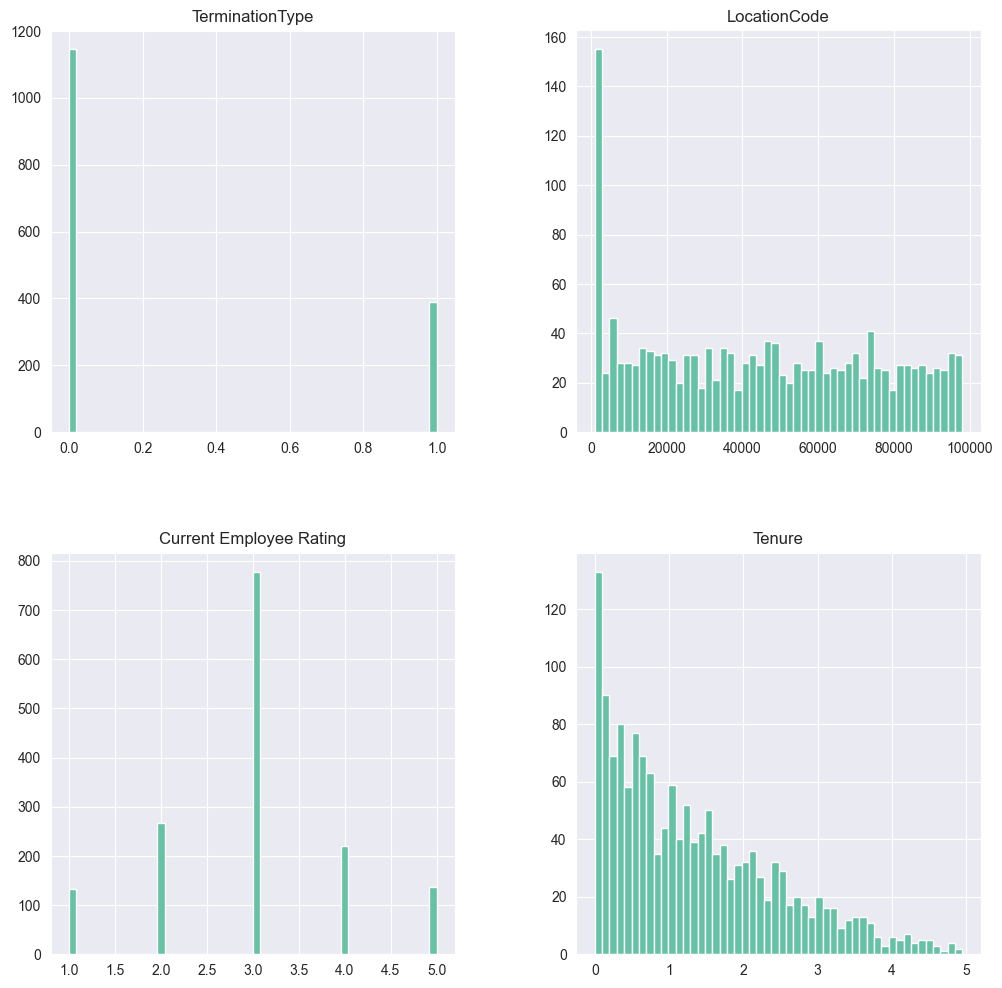

In [280]:
df_with_exit_date.hist(bins=50,figsize=(12,12))
plt.show()

In [281]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2280 entries, 6 to 1531
Columns: 3594 entries, TerminationType to Performance Score_PIP
dtypes: float64(3594)
memory usage: 62.5 MB


In [282]:
# Getting independent and dependent variables 
y = df_encoded['TerminationType']
X = df_encoded.drop(['TerminationType'], axis=1)

<div class="alert alert-block alert-info">

# Logistic Regression
    
</div>

In [283]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [284]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [285]:
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [286]:
# fitting the logistic regression model to the training data
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

c:\Users\Student189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [287]:
# predicting the class for the test data
y_pred = logre.predict(X_test)

In [288]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [289]:
y_test

290     0.0
0       0.0
743     0.0
294     0.0
941     0.0
       ... 
2052    1.0
930     0.0
59      1.0
448     0.0
377     0.0
Name: TerminationType, Length: 456, dtype: float64

In [290]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8070175438596491


In [291]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       385
         1.0       0.10      0.03      0.04        71

    accuracy                           0.81       456
   macro avg       0.47      0.49      0.47       456
weighted avg       0.73      0.81      0.76       456



[[366  19]
 [ 69   2]]


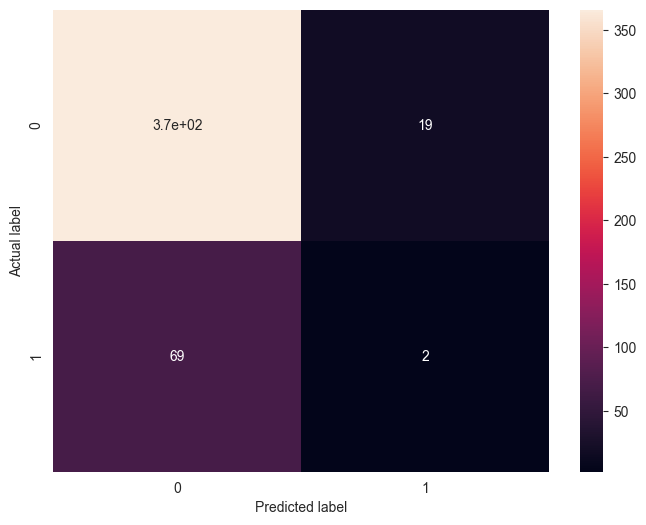

In [292]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

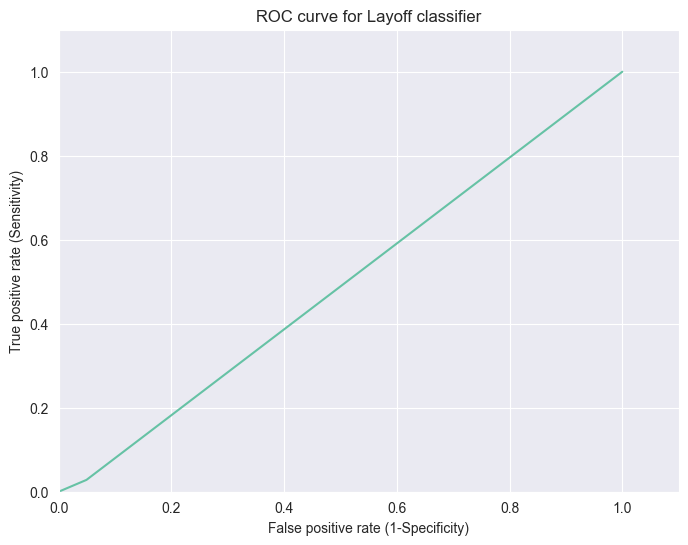

In [293]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Layoff classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [294]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.4894091823669288

<div class="alert alert-block alert-info">

# Decision Tress
    
</div>

In [295]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.8178449460866586, 0.9927536231884058, 'Tenure <= 0.021\ngini = 0.287\nsamples = 1824\nvalue = [1507, 317]\nclass = Involuntary'),
 Text(0.711103928723019, 0.9782608695652174, 'Supervisor_Tina Munoz <= 0.5\ngini = 0.006\nsamples = 619\nvalue = [617, 2]\nclass = Involuntary'),
 Text(0.7047238912621057, 0.9637681159420289, 'LocationCode <= 7308.0\ngini = 0.003\nsamples = 618\nvalue = [617, 1]\nclass = Involuntary'),
 Text(0.6983438538011923, 0.9492753623188406, 'gini = 0.0\nsamples = 604\nvalue = [604, 0]\nclass = Involuntary'),
 Text(0.711103928723019, 0.9492753623188406, 'LocationCode <= 9810.0\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Involuntary'),
 Text(0.7047238912621057, 0.9347826086956522, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Voluntary'),
 Text(0.7174839661839323, 0.9347826086956522, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Involuntary'),
 Text(0.7174839661839323, 0.9637681159420289, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Volu

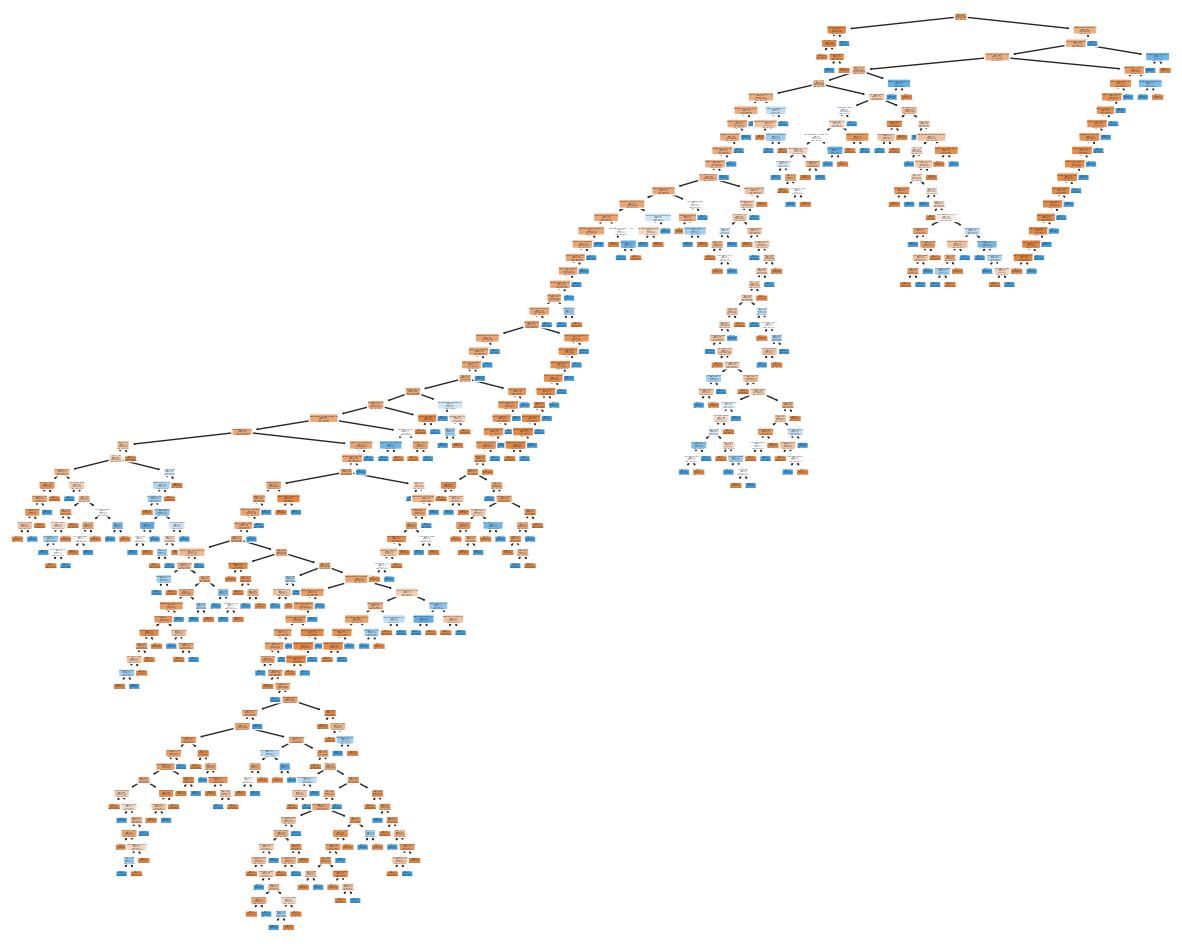

In [296]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Involuntary", "Voluntary"], 
          feature_names=X.columns)

In [297]:
y_pred = clf_dt.predict(X_test)

In [298]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [299]:
y_test

290     0.0
0       0.0
743     0.0
294     0.0
941     0.0
       ... 
2052    1.0
930     0.0
59      1.0
448     0.0
377     0.0
Name: TerminationType, Length: 456, dtype: float64

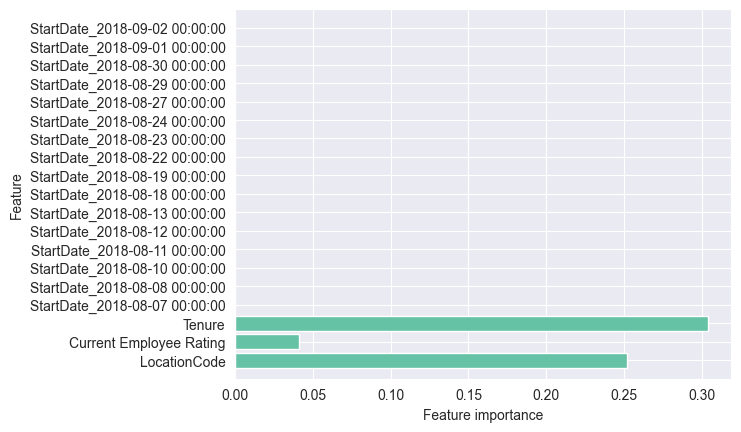

In [300]:
def plot_feature_importances_(model):
    tmp = X.iloc[:, :19]
    n_features = tmp.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_[:19], align='center')
    plt.yticks(np.arange(n_features), X.columns[:19])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(clf_dt)

In [301]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7587719298245614

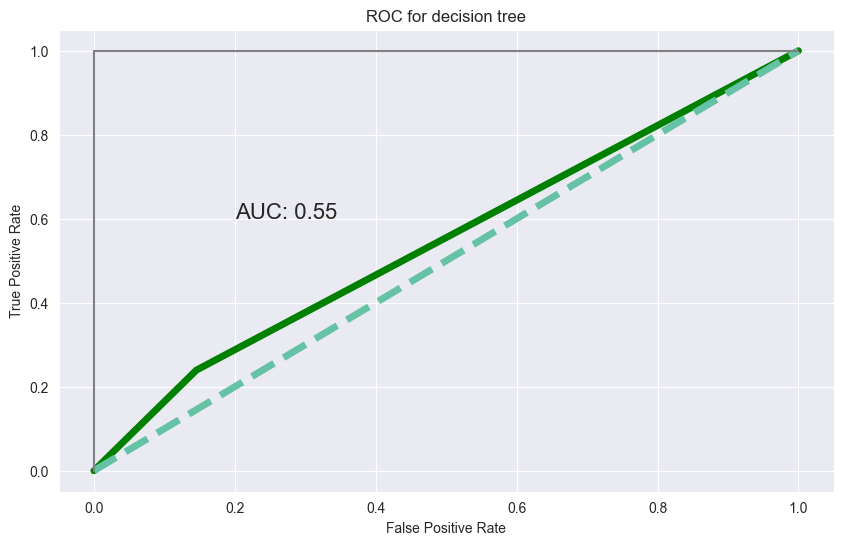

In [302]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [303]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5469910371318821

[[329  56]
 [ 54  17]]


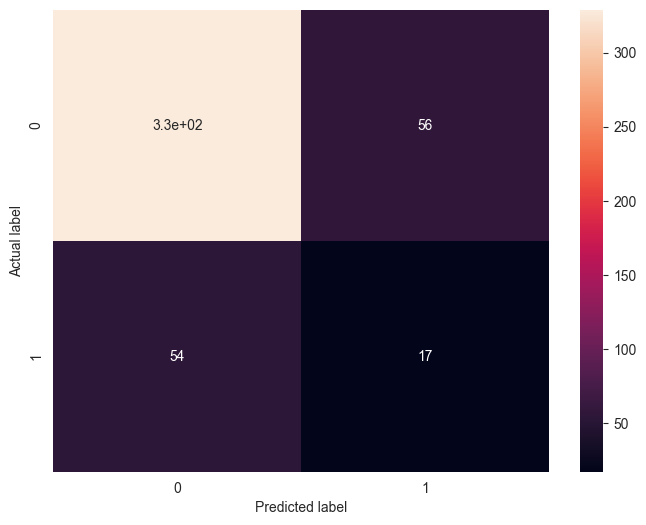

In [304]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [305]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       385
         1.0       0.23      0.24      0.24        71

    accuracy                           0.76       456
   macro avg       0.55      0.55      0.55       456
weighted avg       0.76      0.76      0.76       456



<div class="alert alert-block alert-info">

# Decision Tress After Pruning
    
</div>

In [306]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

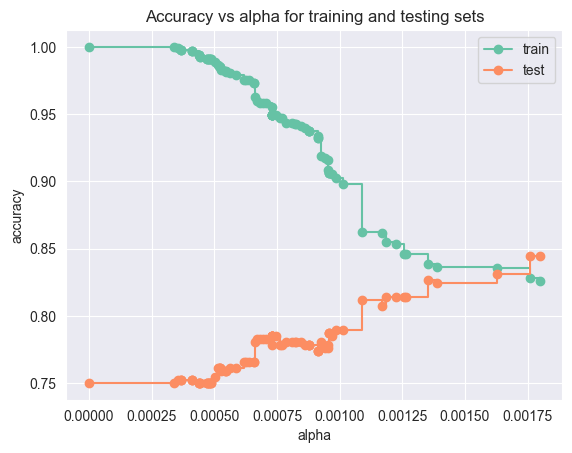

In [307]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

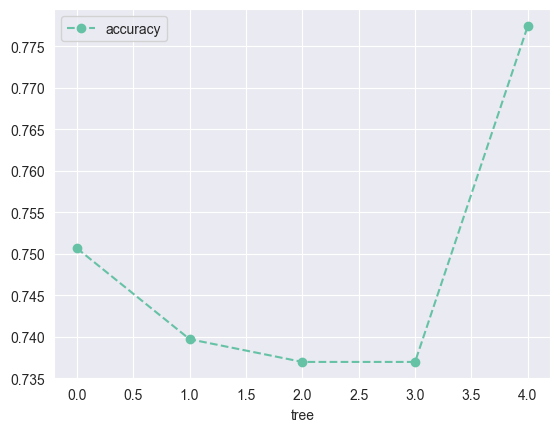

In [308]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0001)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

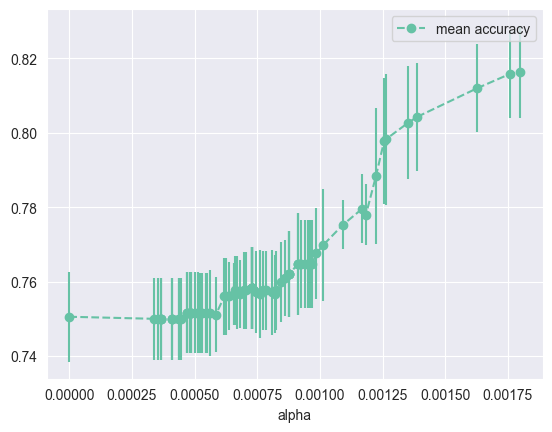

In [309]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 5-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [310]:
alpha_results['mean accuracy'].max()

0.8163254553665513

In [311]:
alpha_results['mean accuracy'].idxmax()

90

In [312]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.0017989326953440354

In [313]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5, 0.75, 'Tenure <= 0.021\ngini = 0.287\nsamples = 1824\nvalue = [1507, 317]\nclass = Involuntary'),
 Text(0.25, 0.25, 'gini = 0.006\nsamples = 619\nvalue = [617, 2]\nclass = Involuntary'),
 Text(0.75, 0.25, 'gini = 0.386\nsamples = 1205\nvalue = [890, 315]\nclass = Involuntary')]

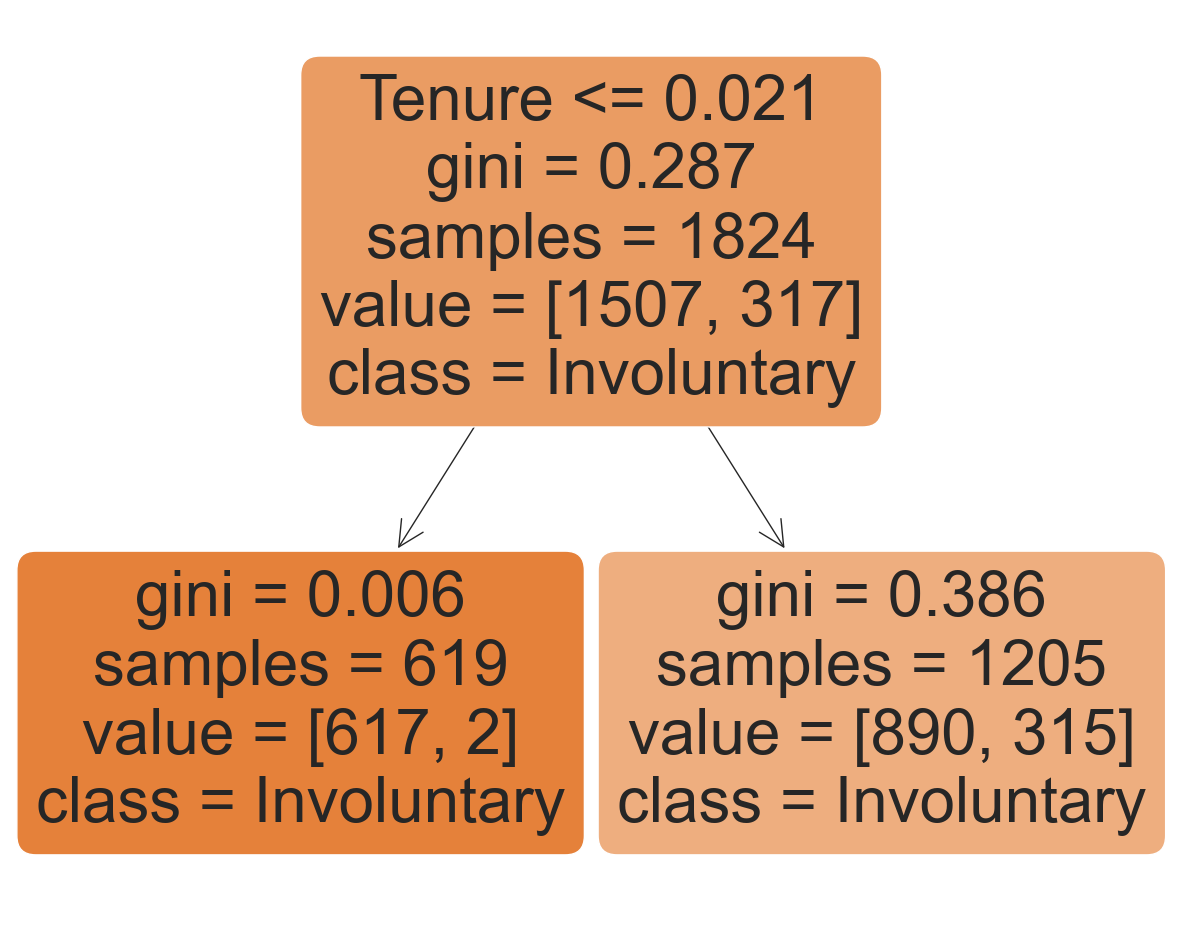

In [314]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Involuntary", "Voluntary"], 
          feature_names=X.columns)

In [315]:
y_pred = clf_dt.predict(X_test)

In [316]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [317]:
y_test

290     0.0
0       0.0
743     0.0
294     0.0
941     0.0
       ... 
2052    1.0
930     0.0
59      1.0
448     0.0
377     0.0
Name: TerminationType, Length: 456, dtype: float64

In [318]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8442982456140351

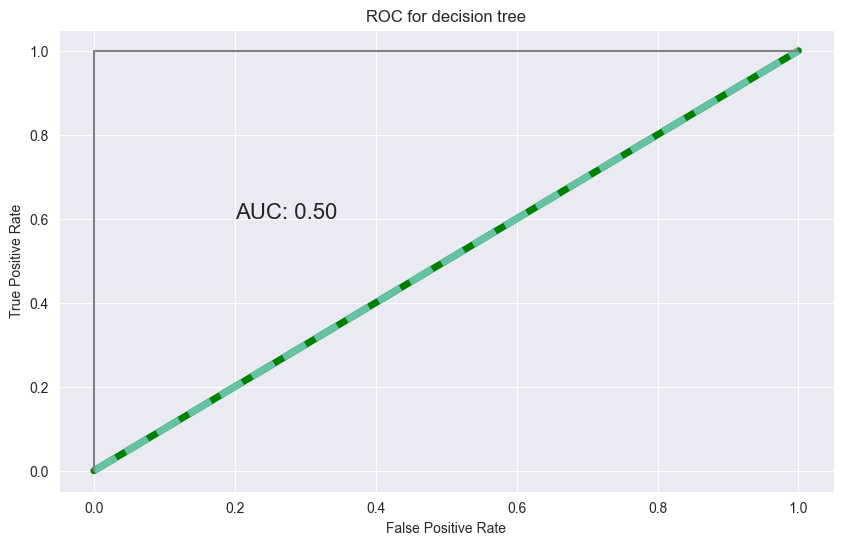

In [319]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [320]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

[[385   0]
 [ 71   0]]


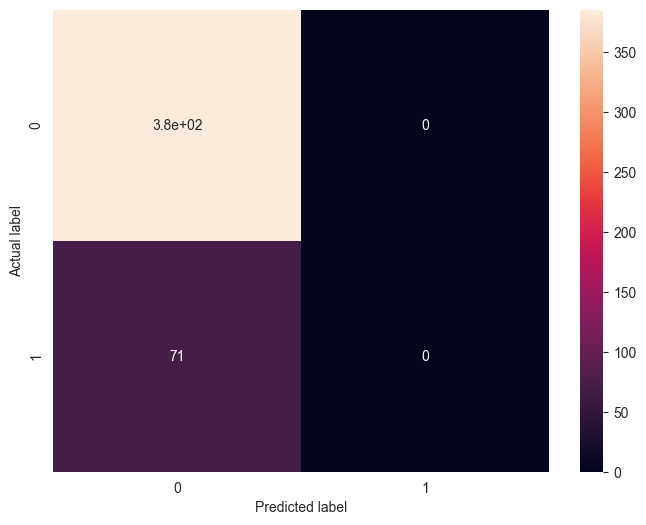

In [321]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [322]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92       385
         1.0       0.00      0.00      0.00        71

    accuracy                           0.84       456
   macro avg       0.42      0.50      0.46       456
weighted avg       0.71      0.84      0.77       456



c:\Users\Student189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Student189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Student189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

<div class="alert alert-block alert-info">

# Random Forest Classifier
    
</div>

In [323]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=10000) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000)

In [324]:
y_pred = clf_rf.predict(X_test)

In [325]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [326]:
y_test

290     0.0
0       0.0
743     0.0
294     0.0
941     0.0
       ... 
2052    1.0
930     0.0
59      1.0
448     0.0
377     0.0
Name: TerminationType, Length: 456, dtype: float64

In [327]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8092105263157895

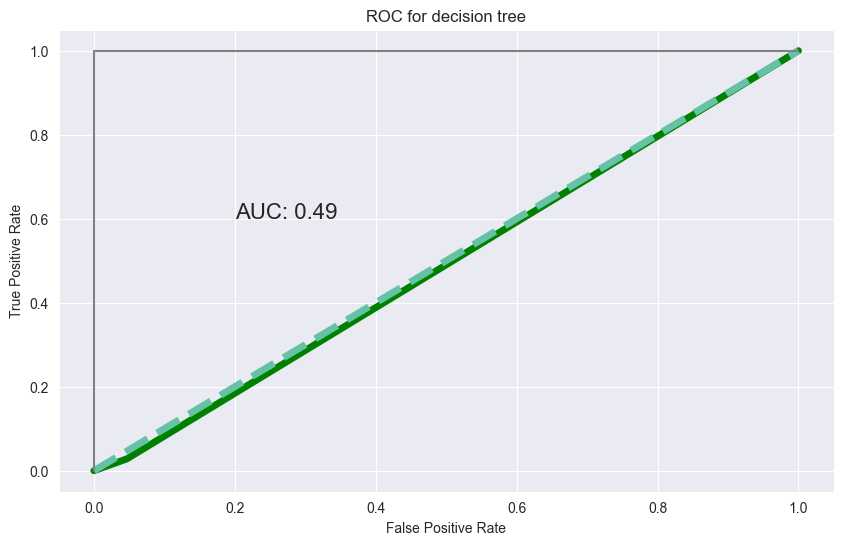

In [328]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [329]:
roc_auc_score(y_test, y_pred)

0.4907078836656301

[[367  18]
 [ 69   2]]


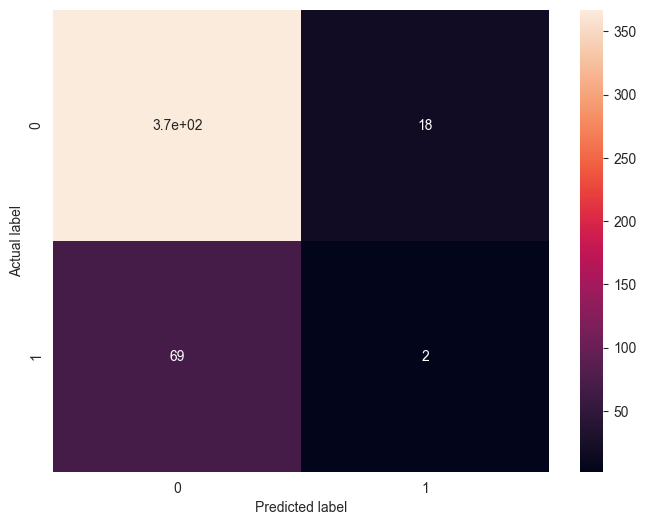

In [330]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [331]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       385
         1.0       0.10      0.03      0.04        71

    accuracy                           0.81       456
   macro avg       0.47      0.49      0.47       456
weighted avg       0.73      0.81      0.76       456



<div class="alert alert-block alert-info">

# Report results using different algorithms: Logistic Regression, Decision Tree, Gradient Boosting, Random Forest, and Multi-layer Perceptron Neural Network
    
</div>

c:\Users\Student189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


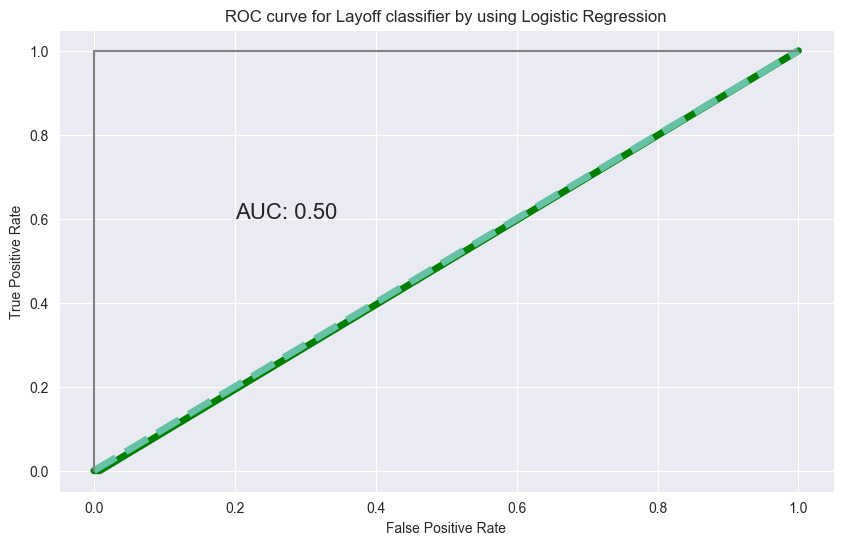


** Logistic Regression Report**
Accuracy: 0.8026
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89       369
         1.0       0.00      0.00      0.00        87

    accuracy                           0.80       456
   macro avg       0.40      0.50      0.45       456
weighted avg       0.65      0.80      0.72       456


[[366   3]
 [ 87   0]]


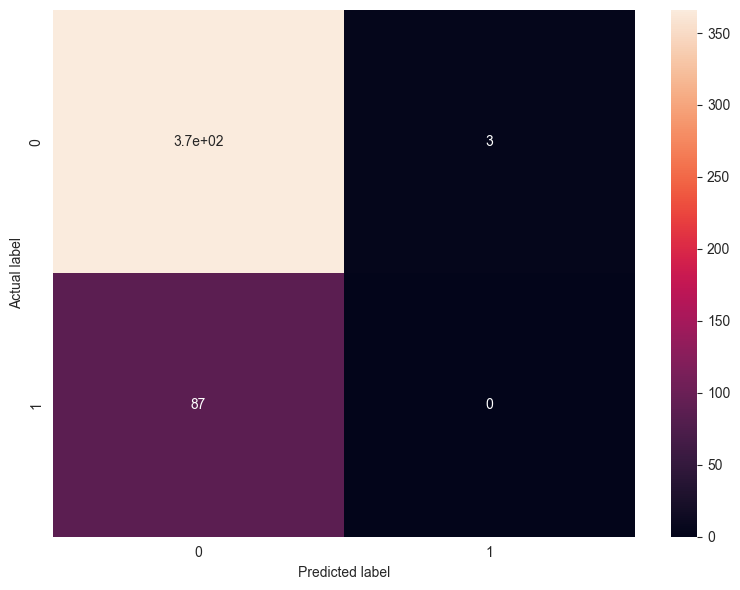

<Figure size 800x600 with 0 Axes>

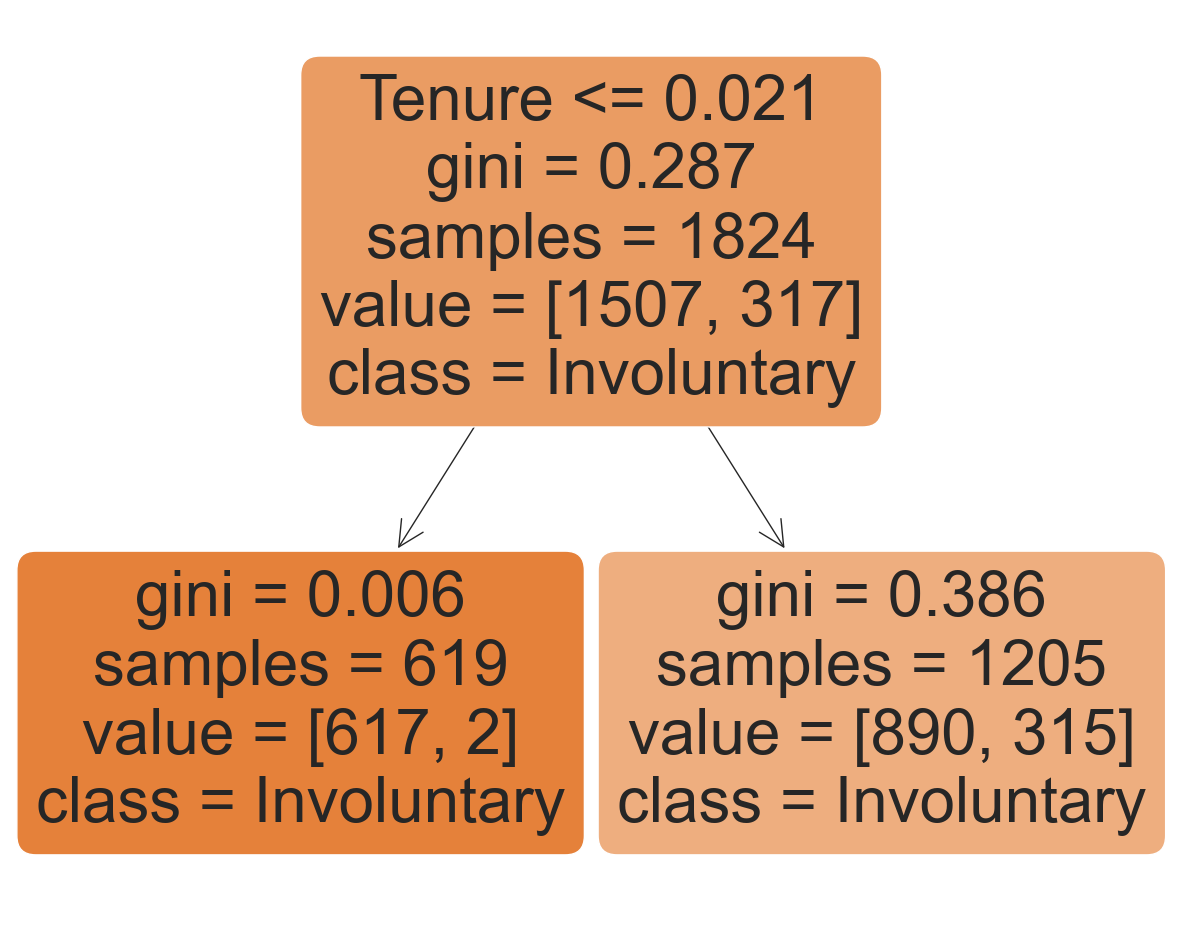

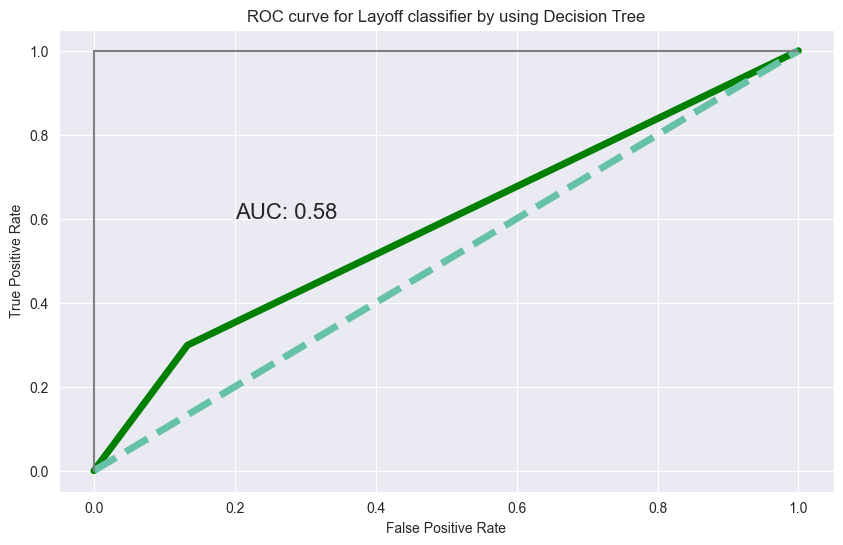


** Decision Tree Report**
Accuracy: 0.7588
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       369
         1.0       0.35      0.30      0.32        87

    accuracy                           0.76       456
   macro avg       0.59      0.58      0.59       456
weighted avg       0.75      0.76      0.75       456


Top 5 Most Important Features (Decision Tree):
Tenure: 0.334
LocationCode: 0.234
Current Employee Rating: 0.038
RaceDesc_Black: 0.013
RaceDesc_Hispanic: 0.013
[[320  49]
 [ 61  26]]


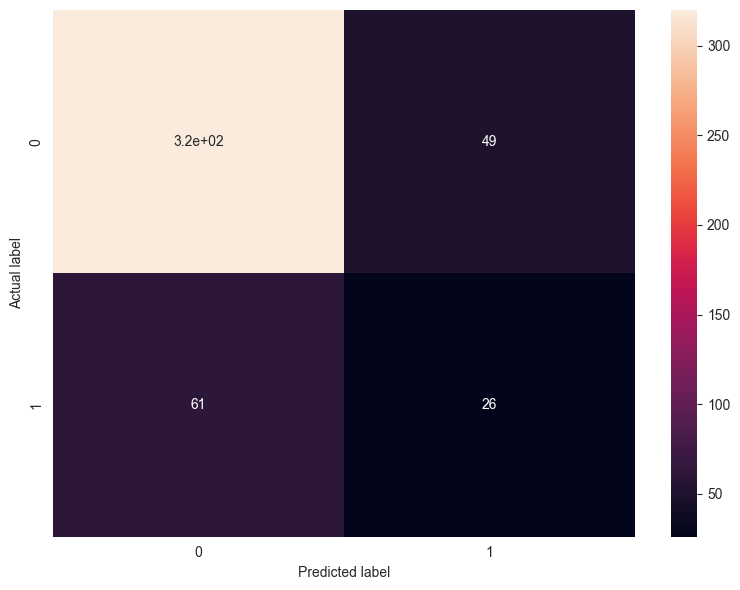

<Figure size 800x600 with 0 Axes>

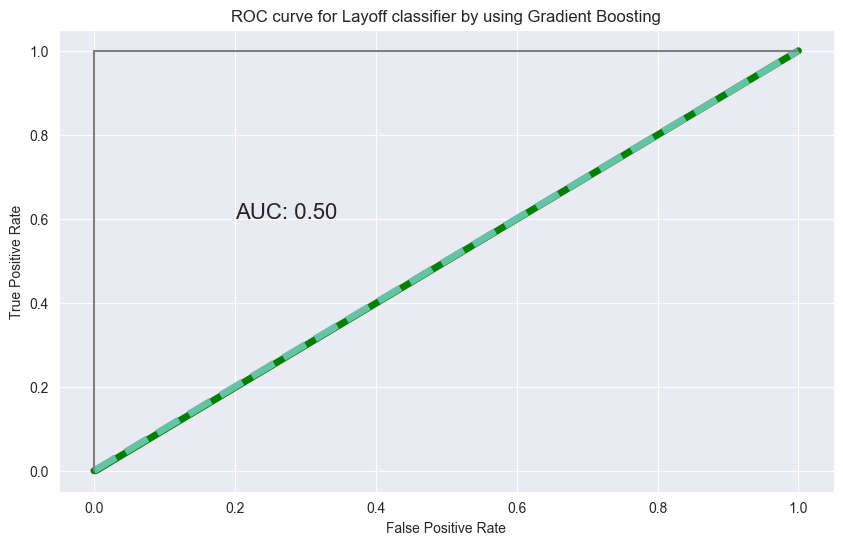


** Gradient Boosting Report**
Accuracy: 0.8070
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       369
         1.0       0.00      0.00      0.00        87

    accuracy                           0.81       456
   macro avg       0.40      0.50      0.45       456
weighted avg       0.65      0.81      0.72       456


Top 5 Most Important Features (Gradient Boosting):
Tenure: 0.367
LocationCode: 0.067
Current Employee Rating: 0.042
ExitDate_2023-07-19 00:00:00: 0.017
ExitDate_2022-12-04 00:00:00: 0.013
[[368   1]
 [ 87   0]]


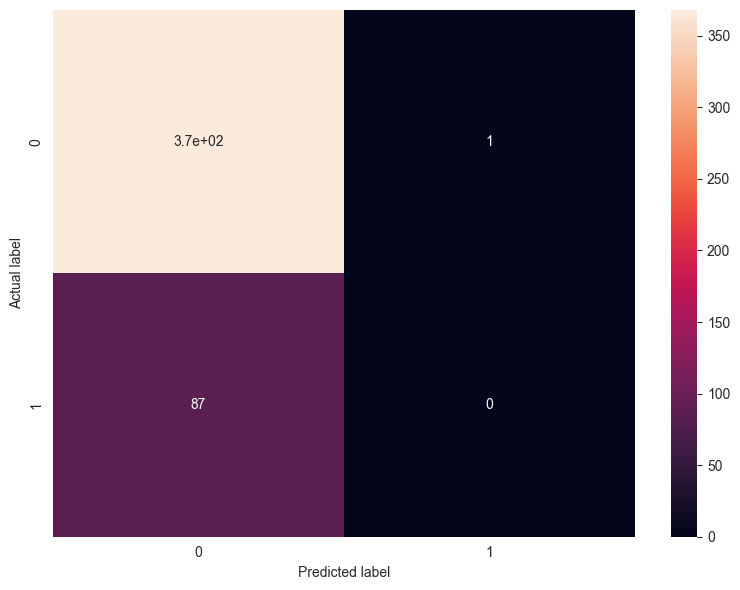

<Figure size 800x600 with 0 Axes>

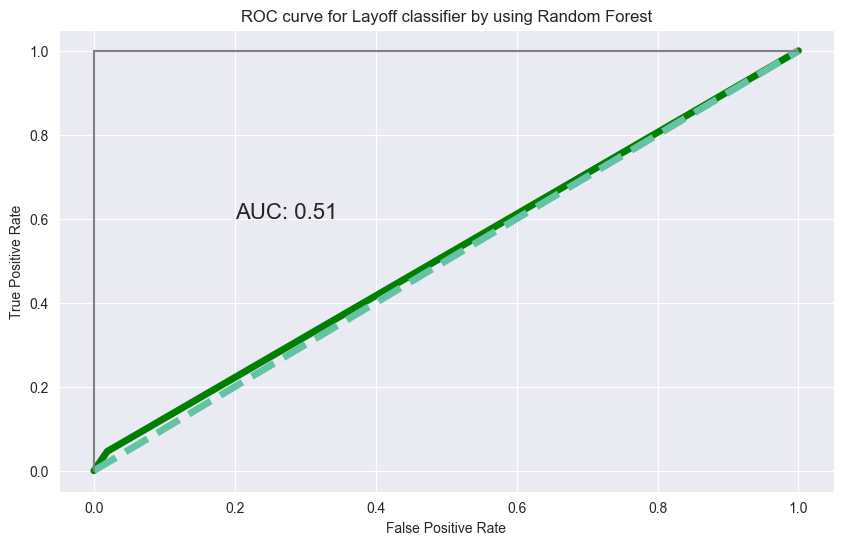


** Random Forest Report**
Accuracy: 0.8026
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       369
         1.0       0.36      0.05      0.08        87

    accuracy                           0.80       456
   macro avg       0.59      0.51      0.49       456
weighted avg       0.73      0.80      0.74       456


Top 5 Most Important Features (Random Forest):
LocationCode: 0.243
Tenure: 0.237
Current Employee Rating: 0.044
State_MA: 0.005
Performance Score_Fully Meets: 0.005
[[362   7]
 [ 83   4]]


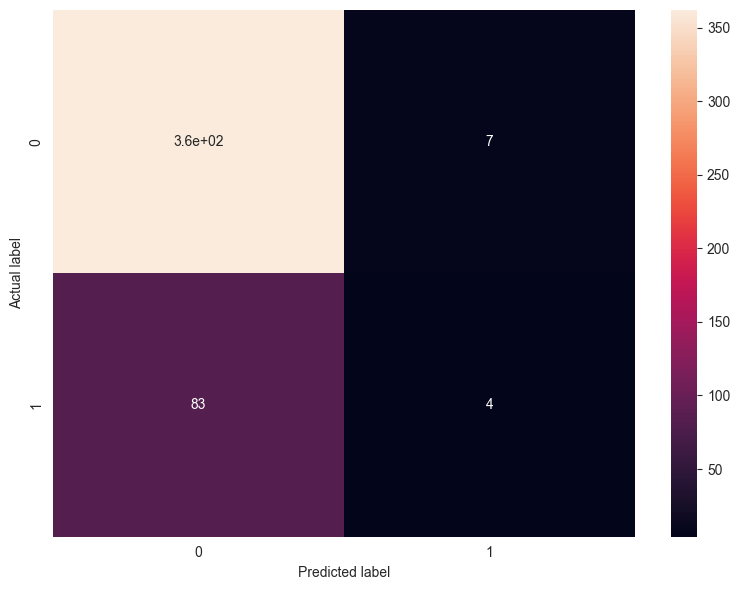

<Figure size 800x600 with 0 Axes>

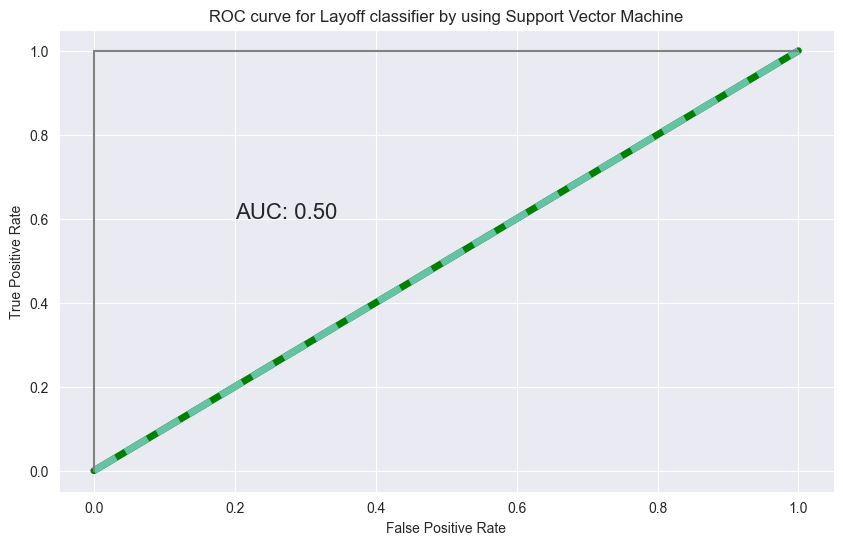


** Support Vector Machine Report**
Accuracy: 0.8092
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       369
         1.0       0.00      0.00      0.00        87

    accuracy                           0.81       456
   macro avg       0.40      0.50      0.45       456
weighted avg       0.65      0.81      0.72       456


[[369   0]
 [ 87   0]]


c:\Users\Student189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Student189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Student189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

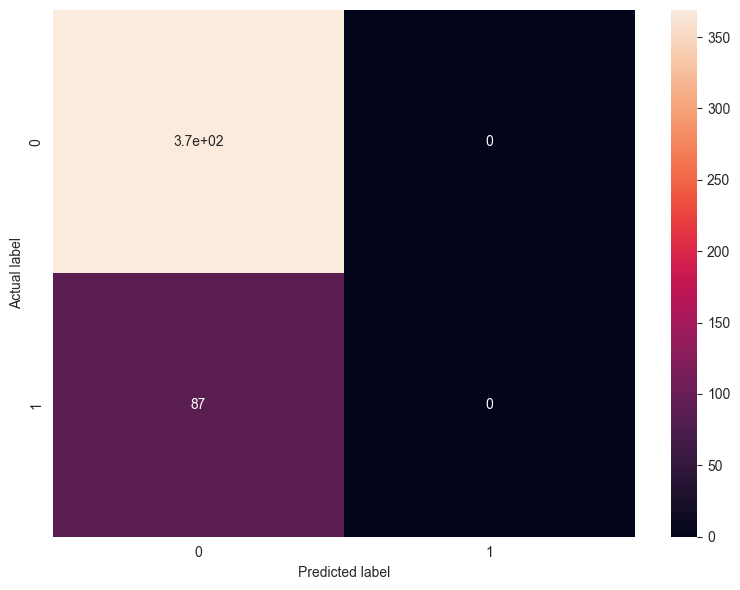

<Figure size 800x600 with 0 Axes>

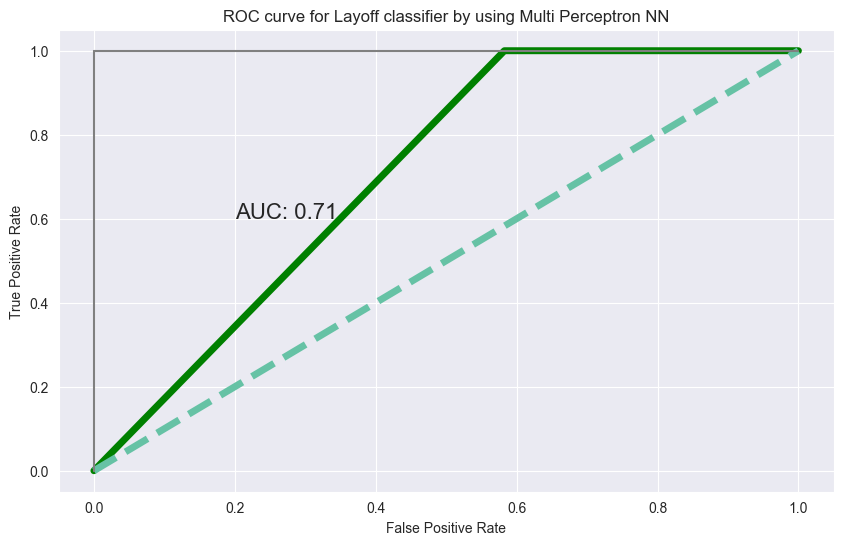


** Multi Perceptron NN Report**
Accuracy: 0.5285
              precision    recall  f1-score   support

         0.0       1.00      0.42      0.59       369
         1.0       0.29      1.00      0.45        87

    accuracy                           0.53       456
   macro avg       0.64      0.71      0.52       456
weighted avg       0.86      0.53      0.56       456


[[154 215]
 [  0  87]]


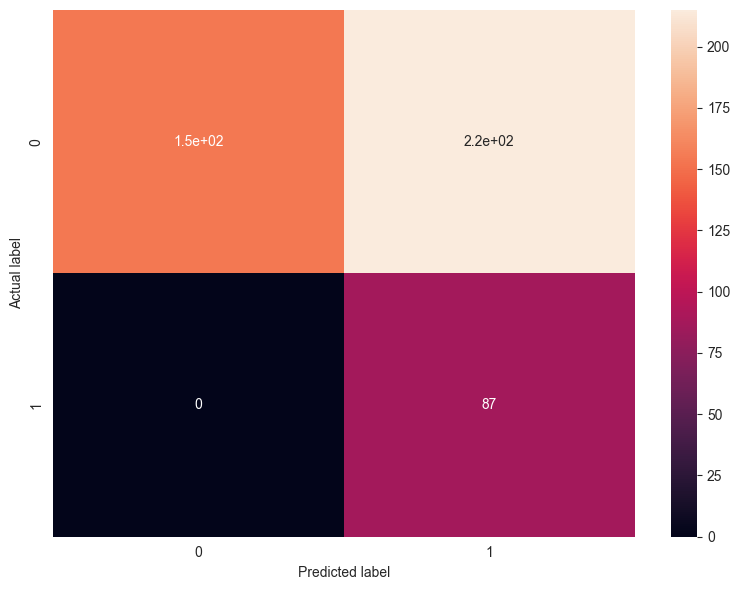

<Figure size 800x600 with 0 Axes>

In [332]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone

def generate_report(model_name, classifier):
  """
  Generates a training, classification, and important features report,
  including visualizations.

  Args:
      X (pd.DataFrame): The DataFrame containing features.
      y (pd.Series): The Series containing target variable.
      model_name (str): The name of the classifier model (e.g., "Logistic Regression").
      classifier (sklearn.base.ClassifierMixin): The classifier object.
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
  X_train.fillna(0, inplace=True)
  X_test.fillna(0, inplace=True)

  y_train.fillna(0, inplace=True)
  y_test.fillna(0, inplace=True)
  

  # Train the model
  classifier.fit(X_train, y_train)

  if model_name == 'Decision Tree':
    plt.figure(figsize=(15, 12))
    plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Involuntary", "Voluntary"], 
          feature_names=X.columns)

  # Make predictions
  y_pred = classifier.predict(X_test)

  # Accuracy
  accuracy = accuracy_score(y_test, y_pred)
 
  #roc curve
  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
  plt.figure(figsize=(10,6))
  plt.title(f"ROC curve for Layoff classifier by using {model_name}"  )
  plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
  plt.plot([0,1],ls='--',linewidth=5)
  plt.plot([0,0],[1,0],c='.5')
  plt.plot([1,1],c='.5')
  plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  

  # Classification report
  report = classification_report(y_test, y_pred)

  # Feature importances (for tree-based models)
  if hasattr(classifier, 'feature_importances_'):
    importances = classifier.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = X.columns[sorted_idx[:5]]  # Top 5 features
    feature_importance_report = f"\nTop 5 Most Important Features ({model_name}):\n" + "\n".join([f"{feature}: {importance:.3f}" for feature, importance in zip(top_features, importances[sorted_idx[:5]])])
  else:
    feature_importance_report = ""  # No feature importance for Logistic Regression

  # Print report
  print(f"\n** {model_name} Report**")
  print(f"Accuracy: {accuracy:.4f}")
  print(report)
  print(feature_importance_report)

  

# Visualizations (assuming you have matplotlib installed)
  # plt.figure(figsize=(10, 6))

  # # Accuracy bar chart
  # plt.subplot(1, 2, 1)
  # plt.bar(model_name, accuracy, color='skyblue')
  # plt.title("Accuracy")
  # plt.xlabel("Model")
  # plt.ylabel("Value")
  # plt.ylim(0, 1)  # Set y-axis limits for accuracy
  # plt.grid(axis='y')

  # Classification report heatmap (if applicable)
  if len(report.split('\n')) > 6:  # Check if report has a table (more than 6 lines)
      try:
         plt.figure(figsize=(8,6))
         print(confusion_matrix(y_test,y_pred))
         sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
         plt.ylabel('Actual label');
         plt.xlabel('Predicted label');
      except IndexError:
          print("Unable to generate classification report heatmap - report format differs.")
  else:
      print("Unable to generate classification report heatmap - report has less than 6 lines.")

  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(8,6)) 

# Call generate_report for different models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC()),
    ("Multi Perceptron NN", MLPClassifier())
]

for model_name, classifier in models:
  generate_report(model_name,clone(classifier))  